In [ ]:
#predictive model for cycling

Columns:
 ['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Athlete Weight', 'Bike Weight', 'Moving Time', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Max Cadence', 'Average Cadence', 'Average Heart Rate', 'Average Watts', 'Calories', 'Average Temperature', 'Total Work', 'Perceived Exertion', 'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Grade Adjusted Distance', 'Average Elapsed Speed', 'Dirt Distance', 'Total Steps', 'Maximum Power 5s', 'Maximum Power 10s', 'Maximum Power 30s', 'Maximum Power 1.0min', 'Maximum Power 5.0min', 'Maximum Power 10.0min', 'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr', 'Maximum Power 1.5 hr', 'Maximum Power 2.0 hr', 'ftp_values']

Renamed columns:
    duration  distance  elevation_gain
0      3859  

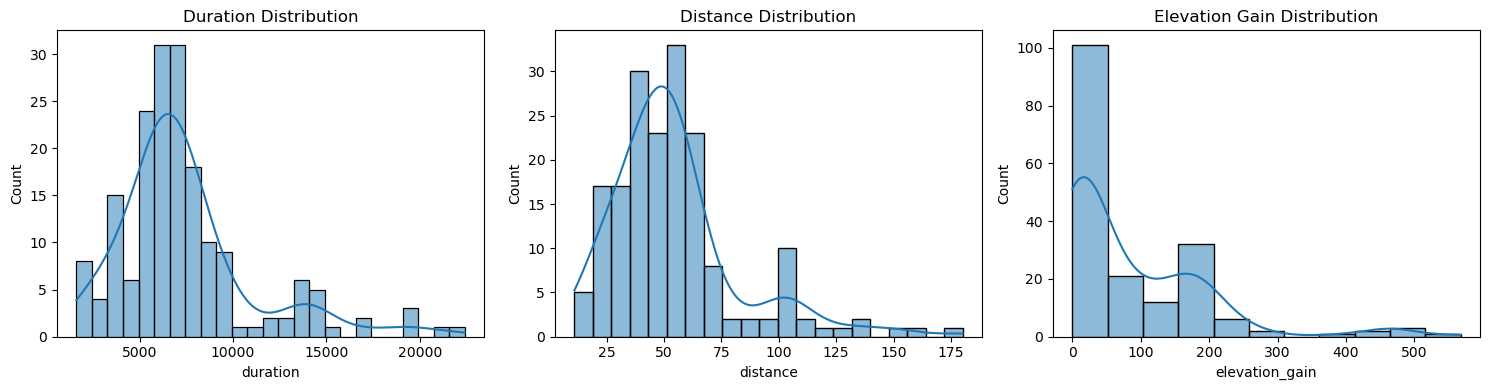


Outliers — duration: 30, distance: 21, elevation_gain: 7


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data from the raw GitHub URL
data_path = (
    "https://raw.githubusercontent.com/"
    "Redback-Operations/redback-fit-sports-performance/"
    "main/Cycling%20Analysis/data/cycling_data_with_ftp.csv"
)
df = pd.read_csv(data_path)
# 2. Inspect what columns you actually have
print("Columns:\n", df.columns.tolist())

# 3. Rename key fields for convenience
df = df.rename(columns={
    'Elapsed Time':    'duration',
    'Distance':        'distance',
    'Elevation Gain':  'elevation_gain'
})

# 4. Quick sanity check
print("\nRenamed columns:\n", df[['duration','distance','elevation_gain']].head())

# 5. Missing-value check
print("\nMissing values:\n", df[['duration','distance','elevation_gain']].isnull().sum())

# 6. Summary statistics
print("\nSummary stats:\n", df[['duration','distance','elevation_gain']].describe())

# 7. Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['duration'],   kde=True, ax=axes[0]).set_title('Duration Distribution')
sns.histplot(df['distance'],   kde=True, ax=axes[1]).set_title('Distance Distribution')
sns.histplot(df['elevation_gain'], kde=True, ax=axes[2]).set_title('Elevation Gain Distribution')
plt.tight_layout()
plt.show()

# 8. Outlier detection (IQR) on renamed columns
def flag_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return s[(s < lower) | (s > upper)]

out_dur  = flag_outliers(df['duration'])
out_dist = flag_outliers(df['distance'])
out_elev = flag_outliers(df['elevation_gain'])
print(f"\nOutliers — duration: {len(out_dur)}, distance: {len(out_dist)}, elevation_gain: {len(out_elev)}")
